<a href="https://colab.research.google.com/github/Gabriele90/ML-for-the-life-sciences-/blob/main/Covid19_detection_using_X_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CNN COVID-19 DETECTION***

Now we will build a Convolutional Neural Network model to classify between the Covid and the Non-Covid Patients. We will accomplish it in by completing each task in the project:

Introduction & Import Libraries
Clone and Explore dataset 
Data Visualization
Data preprocessing and Augmentation
Build a Convolutional Neural Network (CNN)
Compile and Train the Model
Performance Evaluation
Prediction on New Dat

***Import Libraries***

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as numpy
import matplotlib.pyplot as pyplot

***Clone & Explore dataset***

In [7]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 29.98 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [8]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')
#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')
#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [9]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(267).jpg', 'COVID-19 (159).jpg', 'COVID19(234).jpg', 'COVID19(370).jpg', 'COVID19(226).jpg', 'COVID-19 (174).jpg', 'COVID19(481).jpg', 'COVID-19 (160).jpg', 'COVID19(162).jpg', 'COVID19(165).jpg']
['NORMAL(1203).jpg', 'NORMAL(690).jpg', 'NORMAL(53).jpg', 'NORMAL(72).jpg', 'NORMAL(708).jpg', 'NORMAL(103).jpg', 'NORMAL(641).jpg', 'NORMAL(1178).jpg', 'NORMAL(995).jpg', 'NORMAL(1404).jpg']
['COVID19(521).jpg', 'COVID19(415).jpg', 'COVID19(433).jpg', 'COVID19(526).jpg', 'COVID19(450).jpg', 'COVID19(352).jpg', 'COVID19(382).jpg', 'COVID19(439).jpg', 'COVID-19 (767).jpg', 'COVID19(408).jpg']
['NORMAL(322).jpg', 'NORMAL(121).jpg', 'NORMAL(1532).jpg', 'NORMAL(1396).jpg', 'NORMAL(1578).jpg', 'NORMAL(889).jpg', 'NORMAL(1069).jpg', 'NORMAL(1037).jpg', 'NORMAL(1270).jpg', 'NORMAL(329).jpg']


In [10]:
#print the total no of images present in each dir
print("Total images in the training set:", len(train_covid_names+train_normal_names))
print("Total images in the test set:", len(test_covid_names+test_normal_names))

Total images in the training set: 1811
Total images in the test set: 484


***Data Visualization***

In [11]:
#get the filenames from the covid & normal dir of the train dataset
covid_pic =[os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic =[os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)

['/content/datasets/Data/train/COVID19/COVID19(267).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (159).jpg', '/content/datasets/Data/train/COVID19/COVID19(234).jpg', '/content/datasets/Data/train/COVID19/COVID19(370).jpg', '/content/datasets/Data/train/COVID19/COVID19(226).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (174).jpg', '/content/datasets/Data/train/COVID19/COVID19(481).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (160).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1203).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(690).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(53).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(72).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(708).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(103).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(641).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1178).jpg']


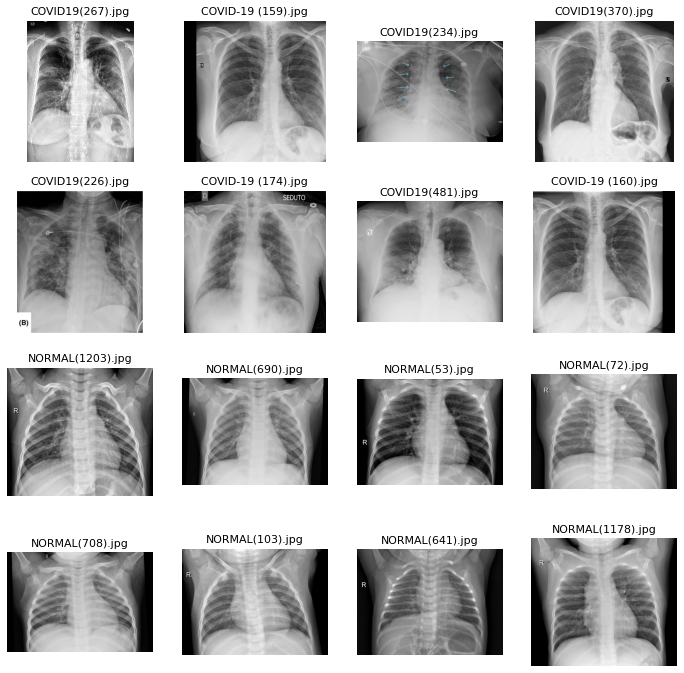

In [12]:
import matplotlib.pyplot as plt
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#merge the covid and normal list
merged_list = covid_pic+normal_pic
for i , img_path in enumerate(merged_list):
  data= img_path.split('/', 6)[6]
  sp = plt.subplot(rows, cols, i + 1 )
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=11)
  plt.imshow(img,cmap='gray')

  plt.show

***Data Preprocessing & Augmentation***

In [13]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale =1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip =True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale =1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset='training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset='validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [14]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [15]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

***Build Convolutional Neural Network Model***

In [16]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

***Compile & Train the Model***

In [17]:
#compile the model
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
#train the model
history=model.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 53s 1s/step - loss: 1.3312 - accuracy: 0.7312 - val_loss: 0.4688 - val_accuracy: 0.9199
Epoch 2/30
46/46 [==============================] - 46s 1000ms/step - loss: 0.2225 - accuracy: 0.9379 - val_loss: 0.2810 - val_accuracy: 0.9420
Epoch 3/30
46/46 [==============================] - 45s 983ms/step - loss: 0.1628 - accuracy: 0.9424 - val_loss: 0.1517 - val_accuracy: 0.9558
Epoch 4/30
46/46 [==============================] - 45s 982ms/step - loss: 0.1755 - accuracy: 0.9399 - val_loss: 0.2294 - val_accuracy: 0.9558
Epoch 5/30
46/46 [==============================] - 45s 975ms/step - loss: 0.1380 - accuracy: 0.9499 - val_loss: 0.1018 - val_accuracy: 0.9558
Epoch 6/30
46/46 [==============================] - 45s 972ms/step - loss: 0.1456 - accuracy: 0.9489 - val_loss: 0.2386 - val_accuracy: 0.9061
Epoch 7/30
46/46 [==============================] - 45s 961ms/step - loss: 0.1491 - accuracy: 0.9498 - val_loss: 0.2181 - val_accuracy: 0.9365
E

***Model Performance Evaluation***

In [19]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

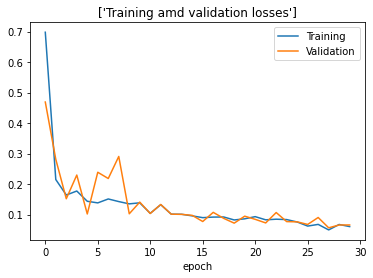

In [20]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title(['Training amd validation losses'])
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

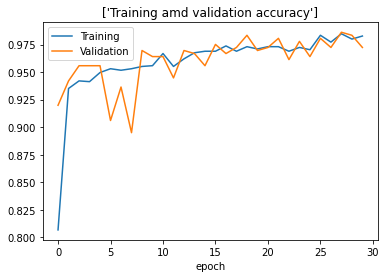

In [21]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title(['Training amd validation accuracy'])
plt.xlabel('epoch')

In [22]:
# get the test accuracy and loss
test_loss,test_acc = model.evaluate(test_generator)
print('test loss :{} test acc:{}'.format(test_loss,test_acc))

16/16 [==============================] - 9s 591ms/step - loss: 0.1037 - accuracy: 0.9607
test loss :0.10366193950176239 test acc:0.96074378490448


***Prediction On New Data***

In [32]:
from google.colab import files 
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
for filename in uploaded.keys():
  img_path ='/content/'+filename
  img = image.load_img(img_path, target_size =(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0:
    print('Covid diagnosis')
  else:
    print('Health status diagnosis')

Saving person1_virus_6.jpeg to person1_virus_6.jpeg
Saving person1_virus_7.jpeg to person1_virus_7.jpeg
Saving person1_virus_8.jpeg to person1_virus_8.jpeg
person1_virus_6.jpeg
Covid diagnosis
person1_virus_7.jpeg
Health status diagnosis
person1_virus_8.jpeg
Covid diagnosis
